## Home assignment

1. First I load all the packages needed for the assignment

In [103]:
import glob
from nilearn.image import load_img
import os
import nilearn.plotting
import nibabel
import matplotlib.pyplot as plt
import numpy as np

2. I set up a function which will read my file based on it's directory, name, and extension

In [64]:
# First I defined a function to read my files

def file_locator(directory, file_name, extension):
   
   # Checking that the directory does actually exist
   # (without this piece of code, it does not work, check the end of this notebook for further information)
    if not os.path.isdir(directory):
        print("Nonexistent")
        return None
    
    matching_files = glob.glob(os.path.join(directory, f"{file_name}{extension}"))
    # using the 'normpath' function to ensure the path is read as a raw string going further (check the end)
    return os.path.normpath(matching_files[0])

# I define the directory where the files are
directory = r"C:\Users\jasmi\Documents\university\P1&2\Programming\programming home assn"

# and then test that the files are being located
print(file_locator(directory, "anatomical", ".nii.gz"))
print(file_locator(directory, "uniformity", ".nii.gz"))

C:\Users\jasmi\Documents\university\P1&2\Programming\programming home assn\anatomical.nii.gz
C:\Users\jasmi\Documents\university\P1&2\Programming\programming home assn\uniformity.nii.gz


3. Now I can use the function I have set up, along with preexisting functions from nilearn, to visualise the images

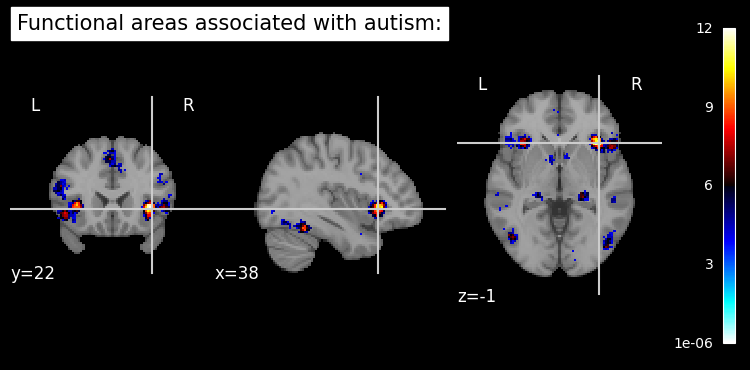

In [75]:
# Next I can load and visualise the file
file = file_locator(directory, "uniformity", ".nii.gz")
img = load_img(file)

# plotting the visual depiction of the activations, and adding a black background and title
nilearn.plotting.plot_stat_map(img, black_bg='black', title = "Functional areas associated with autism:")

(4. Other images can be visualised merely by changing one of the function parameters to find the file)

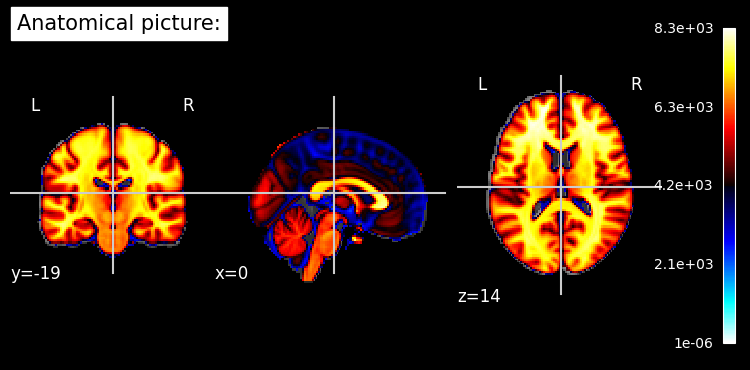

In [125]:
# and the same can be done with the other image, and compacted code

img = load_img(file_locator(directory, "anatomical", ".nii.gz"))

nilearn.plotting.plot_stat_map(img, black_bg='black', title = "Anatomical picture:")

# code without text

In [ ]:
def file_locator(directory, file_name, extension):
       
    if not os.path.isdir(directory):
        print("Nonexistent")
        return None
    matching_files = glob.glob(os.path.join(directory, f"{file_name}{extension}"))
    return os.path.normpath(matching_files[0])

directory = r"C:\Users\jasmi\Documents\university\P1&2\Programming\programming home assn"
print(file_locator(directory, "anatomical", ".nii.gz"))
print(file_locator(directory, "uniformity", ".nii.gz"))

img = load_img(file_locator(directory, "uniformity", ".nii.gz"))
nilearn.plotting.plot_stat_map(img, black_bg='black', title = "Functional picture:")

5. Plotting a histogram

Text(0, 0.5, 'Voxel Frequency')

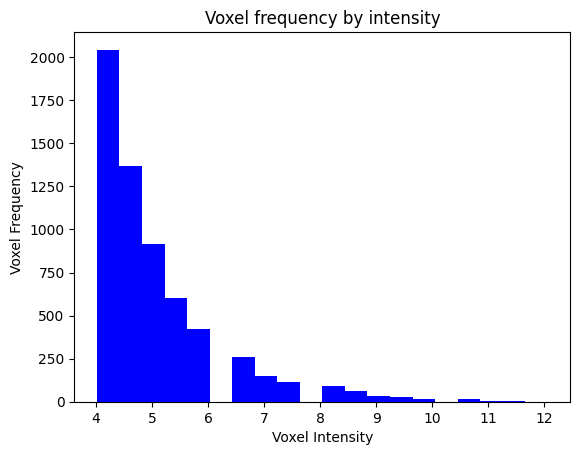

In [ ]:
# I define the directory for the needed files
directory = r"C:\Users\jasmi\Documents\university\P1&2\Programming\programming home assn"

# and again load the file
file2 = file_locator(directory, "uniformity", ".nii.gz")
img = nib.load(file2)

# Then use the image file to obtain a NumPy array
data = img.get_fdata()

# then process the data for visualisation
# flattening to turn the 3-dimensional data into 1-dimensional
voxel_values = data.flatten()
# and removing the background values that will skew the image
voxel_values = voxel_values[voxel_values > 0]

# And then plotting the histogram

# first, defining the bins, to make it look better
bin_edges = np.linspace(np.min(voxel_values), np.max(voxel_values), 21)
# plotting
plt.hist(voxel_values, bins=bin_edges, color='blue', alpha=1, rwidth=1.5)

# editing details
plt.title('Voxel frequency by intensity')
plt.xlabel('Voxel Intensity')
plt.ylabel('Voxel Frequency')

# code without text

In [ ]:
directory = r"C:\Users\jasmi\Documents\university\P1&2\Programming\programming home assn"

file2 = file_locator(directory, "uniformity", ".nii.gz")
img = nib.load(file2)
data = img.get_fdata()

voxel_values = data.flatten()
voxel_values = voxel_values[voxel_values > 0]

bin_edges = np.linspace(np.min(voxel_values), np.max(voxel_values), 21)
plt.hist(voxel_values, bins=bin_edges, color='blue', alpha=1, rwidth=1.5)
plt.title('Voxel frequency by intensity')
plt.xlabel('Voxel Intensity')
plt.ylabel('Voxel Frequency')

# issues

Unfortunately, the exact code used to find the file, but without the directory check, did not work. I like to do the code in a bare minimum way, so this disturbed me, as I do not see why the same exact repository can not be found, when it definitely exists, as the check confirmation shows.

I inserted to code below to demonstrate, and hope the actual code which works is clear enough.

In [50]:
def file_loc(directory, file_name, extension):
    matching_files = glob.glob(os.path.join(directory, f"{file_name}{extension}"))

direct= r"C:\Users\jasmi\Documents\university\P1&2\Programming\programming home assn"

# and then test that the files are being located
print(file_loc(direct, "anatomical", ".nii.gz"))

None


without the 'normpath' function, the string was read by the histogram code without the 'r' included, which my computer requires. 'os.path.normpath' fixed this issue enabling me to use my file for the histogram.

In [ ]:
    return matching_files